In [29]:
import random
import numpy as np
import statistics 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from scipy import ndimage
from scipy import stats
from scipy.spatial import distance
from scipy.stats.stats import pearsonr 
import scipy.signal 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from itertools import cycle
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# import caiman as cm
# from caiman.source_extraction import cnmf
# from caiman.utils.utils import download_demo
# from caiman.utils.visualization import inspect_correlation_pnr
# from caiman.motion_correction import MotionCorrect
# from caiman.source_extraction.cnmf import params as params
# import matlab
# import matlab.engine

#plotting params
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = '0.5'
mpl.rcParams['axes.labelsize'] = '8'
mpl.rcParams['axes.labelcolor'] = 'black'

mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['xtick.labelsize'] = '4'
mpl.rcParams['ytick.labelsize'] = '4'
mpl.rcParams['ytick.color'] = 'black'

import matplotlib as mpl
c = np.arange(1, 10 + 1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap_ON = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greens)
cmap_OFF = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Purples)
cmap_WT = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap_KO = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Oranges)

In [30]:
# WT
ANF_df = pd.read_csv('/Users/rufusmitchell-heggs/Desktop/data/preprocessing/ANF/preprocessed_files/onoff.csv')
ANF_pre = ANF_df.loc[:, ANF_df.columns.str.contains('Pre')]
ANF_nov = ANF_df.loc[:, ANF_df.columns.str.contains('Nov')]
ANF_total_cells_pre = [182, 150]
ANF_total_cells_nov = [182, 150, 163]

ANI_df = pd.read_csv('/Users/rufusmitchell-heggs/Desktop/data/preprocessing/ANI/preprocessed_files/onoff.csv')
ANI_pre = ANI_df.loc[:, ANI_df.columns.str.contains('Pre')]
ANI_nov = ANI_df.loc[:, ANI_df.columns.str.contains('Nov')]
ANI_total_cells_pre = [91, 87]
ANI_total_cells_nov = [91, 87, 80]

# KO
ANL_df = pd.read_csv('/Users/rufusmitchell-heggs/Desktop/data/preprocessing/ANL/preprocessed_files/onoff.csv')
ANL_pre = ANL_df.loc[:, ANL_df.columns.str.contains('Pre')]
ANL_nov = ANL_df.loc[:, ANL_df.columns.str.contains('Nov')]
ANL_total_cells_pre = [58, 50]
ANL_total_cells_nov = [58, 50, 53]

In [31]:
def retained_cells(lists_to_compare):
    """Iterates through lists of on off cells and compares 
    which ones are retained and which ones are lost"""
    common_cells_all = []
    lost_cells_all = []
    for i in range(len(lists_to_compare)):
        for j in range(len(lists_to_compare)):
            
            if len(lists_to_compare) ==3:
                for k in range(len(lists_to_compare)):
                    if i==0 and j==1 and k==2:
                        common_cells = []
                        lost_cells = []
                        for kk in lists_to_compare[i]:
                            if len(str(kk)) > 1:
                                if kk in lists_to_compare[j] and kk in lists_to_compare[k]:
                                    common_cells.append(kk)
                                else:
                                    lost_cells.append(kk)
                        common_cells_all.append(len(common_cells))
                        lost_cells_all.append(len(lost_cells))
            if j != i and i < j:
                common_cells = []
                lost_cells = []
                for ii in lists_to_compare[i]:
                    if len(str(ii)) > 1:
                        if ii in lists_to_compare[j]:
                            common_cells.append(ii)
                        else:
                            lost_cells.append(ii)
                common_cells_all.append(len(common_cells))
                lost_cells_all.append(len(lost_cells))
    return common_cells_all, lost_cells_all

#WT (order in list = session 1+2+3, session1+2, session1+3, session2+3)
ANF_preon_common, ANF_preon_lost = retained_cells(np.array(ANF_pre.loc[:, ANF_pre.columns.str.contains('on')]).transpose())
ANF_preoff_common, ANF_preoff_lost = retained_cells(np.array(ANF_pre.loc[:, ANF_pre.columns.str.contains('off')]).transpose())
ANF_novon_common, ANF_novon_lost = retained_cells(np.array(ANF_nov.loc[:, ANF_nov.columns.str.contains('on')]).transpose())
ANF_novoff_common, ANF_novoff_lost = retained_cells(np.array(ANF_nov.loc[:, ANF_nov.columns.str.contains('off')]).transpose())

# KO
ANL_preon_common, ANL_preon_lost = retained_cells(np.array(ANL_pre.loc[:, ANL_pre.columns.str.contains('on')]).transpose())
ANL_preoff_common, ANL_preoff_lost = retained_cells(np.array(ANL_pre.loc[:, ANL_pre.columns.str.contains('off')]).transpose())
ANL_novon_common, ANL_novon_lost = retained_cells(np.array(ANL_nov.loc[:, ANL_nov.columns.str.contains('on')]).transpose())
ANL_novoff_common, ANL_novoff_lost = retained_cells(np.array(ANL_nov.loc[:, ANL_nov.columns.str.contains('off')]).transpose())

ANI_preon_common, ANI_preon_lost = retained_cells(np.array(ANI_pre.loc[:, ANI_pre.columns.str.contains('on')]).transpose())
ANI_preoff_common, ANL_preoff_lost = retained_cells(np.array(ANI_pre.loc[:, ANI_pre.columns.str.contains('off')]).transpose())
ANI_novon_common, ANI_novon_lost = retained_cells(np.array(ANI_nov.loc[:, ANI_nov.columns.str.contains('on')]).transpose())
ANI_novoff_common, ANI_novoff_lost = retained_cells(np.array(ANI_nov.loc[:, ANI_nov.columns.str.contains('off')]).transpose())

# KO Average and Error bars
KO_preon_common_avg = np.mean(np.array([ANL_preon_common, ANI_preon_common]), axis=0)
KO_preon_common_err = stats.sem(np.array([ANL_preon_common, ANI_preon_common]))
KO_novon_common_avg = np.mean(np.array([ANL_novon_common, ANI_novon_common]), axis=0)
KO_novon_common_err = stats.sem(np.array([ANL_novon_common, ANI_novon_common]))

KO_preoff_common_avg = np.mean(np.array([ANL_preoff_common, ANI_preoff_common]), axis=0)
KO_preoff_common_err = stats.sem(np.array([ANL_preoff_common, ANI_preoff_common]))
KO_novoff_common_avg = np.mean(np.array([ANL_novoff_common, ANI_novoff_common]), axis=0)
KO_novoff_common_err = stats.sem(np.array([ANL_novoff_common, ANI_novoff_common]))

# KO pooled
KO_preon_common_pooled = np.array(ANL_preon_common)+ np.array(ANI_preon_common)
KO_novon_common_pooled = np.array(ANL_novon_common)+ np.array(ANI_novon_common) 
KO_preoff_common_pooled = np.array(ANL_preoff_common)+ np.array(ANI_preoff_common)
KO_novoff_common_pooled = np.array(ANL_novoff_common)+ np.array(ANI_novoff_common)

In [32]:
# WT number of on cells
ANF_preon = np.array(ANF_pre.loc[:, ANF_pre.columns.str.contains('on')]).transpose()
ANF_preoff = np.array(ANF_pre.loc[:, ANF_pre.columns.str.contains('off')]).transpose()
ANF_novon = np.array(ANF_nov.loc[:, ANF_nov.columns.str.contains('on')]).transpose()
ANF_novoff = np.array(ANF_nov.loc[:, ANF_nov.columns.str.contains('off')]).transpose()

ANI_preon = np.array(ANI_pre.loc[:, ANI_pre.columns.str.contains('on')]).transpose()
ANI_preoff = np.array(ANI_pre.loc[:, ANI_pre.columns.str.contains('off')]).transpose()
ANI_novon = np.array(ANI_nov.loc[:, ANI_nov.columns.str.contains('on')]).transpose()
ANI_novoff = np.array(ANI_nov.loc[:, ANI_nov.columns.str.contains('off')]).transpose()

# KO number of on cells
ANL_preon = np.array(ANL_pre.loc[:, ANL_pre.columns.str.contains('on')]).transpose()
ANL_preoff = np.array(ANL_pre.loc[:, ANL_pre.columns.str.contains('off')]).transpose()
ANL_novon = np.array(ANL_nov.loc[:, ANL_nov.columns.str.contains('on')]).transpose()
ANL_novoff = np.array(ANL_nov.loc[:, ANL_nov.columns.str.contains('off')]).transpose()

def number_onoff(stages_onoff, stage_total_cells):
    stage_onoff_all = []
    num_onoff_cells = []
    percentage_ofcells = []
    for session in range(len(stages_onoff)):
        stage_onoff = []
        for cell in stages_onoff[session]:
            if len(str(cell)) > 1:
                stage_onoff.append(cell)
        stage_onoff_all.append(stage_onoff)
        num_onoff_cells.append(len(stage_onoff))
        percentage_ofcells.append((len(stage_onoff)/stage_total_cells[session])*100)
    return num_onoff_cells, percentage_ofcells

# WT
ANF_pre_on, ANF_percentage_pre_on = number_onoff(ANF_preon, ANF_total_cells_pre)
ANF_pre_off, ANF_percentage_pre_off = number_onoff(ANF_preoff, ANF_total_cells_pre)
ANF_nov_on, ANF_percentage_nov_on = number_onoff(ANF_novon, ANF_total_cells_nov)
ANF_nov_off, ANF_percentage_nov_off = number_onoff(ANF_novoff, ANF_total_cells_nov)
ANF_percentage_pre_off = [1,2] 

ANF_on_off_ratio = [item for sublist in [np.array(ANF_percentage_pre_on)/np.array(ANF_percentage_pre_off), np.array(ANF_percentage_nov_on)/np.array(ANF_percentage_nov_off)] for item in sublist] 

ANF_Avg_ratio = np.mean(np.array(ANF_on_off_ratio))
ANF_Avg_ratio_err = stats.sem(np.array(ANF_on_off_ratio))
print(ANF_percentage_pre_on, ANF_percentage_pre_off, ANF_percentage_nov_on, ANF_percentage_nov_off)
# KO
ANL_pre_on, ANL_percentage_pre_on = number_onoff(ANL_preon, ANL_total_cells_pre)
ANL_pre_off, ANL_percentage_pre_off = number_onoff(ANL_preoff, ANL_total_cells_pre)
ANL_nov_on, ANL_percentage_nov_on = number_onoff(ANL_novon, ANL_total_cells_nov)
ANL_nov_off, ANL_percentage_nov_off = number_onoff(ANL_novoff, ANL_total_cells_nov)

ANI_pre_on, ANI_percentage_pre_on = number_onoff(ANI_preon, ANI_total_cells_pre)
ANI_pre_off, ANI_percentage_pre_off = number_onoff(ANI_preoff, ANI_total_cells_pre)
ANI_nov_on, ANI_percentage_nov_on = number_onoff(ANI_novon, ANI_total_cells_nov)
ANI_nov_off, ANI_percentage_nov_off = number_onoff(ANI_novoff, ANI_total_cells_nov)

# KO pooled
KO_pre_on, KO_percentage_pre_on = [[(ANL_pre_on[0]+ANI_pre_on[0]), 
                                    (ANL_pre_on[1]+ANI_pre_on[1])],
                                   [100*(ANL_pre_on[0]+ANI_pre_on[0])/(ANI_total_cells_pre[0]+ANL_total_cells_pre[0]), 
                                    100*(ANL_pre_on[1]+ANI_pre_on[1])/(ANI_total_cells_pre[1]+ANL_total_cells_pre[1])]]

KO_pre_off,KO_percentage_pre_off = [[(ANL_pre_off[0]+ANI_pre_off[0]), 
                                    (ANL_pre_off[1]+ANI_pre_off[1])],
                                   [100*(ANL_pre_off[0]+ANI_pre_off[0])/(ANI_total_cells_pre[0]+ANL_total_cells_pre[0]), 
                                    100*(ANL_pre_off[1]+ANI_pre_off[1])/(ANI_total_cells_pre[1]+ANL_total_cells_pre[1])]]

KO_nov_on, KO_percentage_nov_on = [[(ANL_nov_on[0]+ANI_nov_on[0]), 
                                    (ANL_nov_on[1]+ANI_nov_on[1])],
                                   [100*(ANL_nov_on[0]+ANI_nov_on[0])/(ANI_total_cells_nov[0]+ANL_total_cells_nov[0]), 
                                    100*(ANL_nov_on[1]+ANI_nov_on[1])/(ANI_total_cells_nov[1]+ANL_total_cells_nov[1]),
                                    100*(ANL_nov_on[2]+ANI_nov_on[2])/(ANI_total_cells_nov[1]+ANL_total_cells_nov[2])]]

KO_nov_off, KO_percentage_nov_off = [[(ANL_nov_off[0]+ANI_nov_off[0]), 
                                    (ANL_nov_off[1]+ANI_nov_off[1])],
                                   [100*(ANL_nov_off[0]+ANI_nov_off[0])/(ANI_total_cells_nov[0]+ANL_total_cells_nov[0]), 
                                    100*(ANL_nov_off[1]+ANI_nov_off[1])/(ANI_total_cells_nov[1]+ANL_total_cells_nov[1]),
                                    100*(ANL_nov_off[2]+ANI_nov_off[2])/(ANI_total_cells_nov[2]+ANL_total_cells_nov[2])]]

KO_on_off_ratio = [item for sublist in [np.array(KO_percentage_pre_on)/np.array(KO_percentage_pre_off), np.array(KO_percentage_nov_on)/np.array(KO_percentage_nov_off)] for item in sublist] 
KO_Avg_ratio = np.mean(np.array(KO_on_off_ratio))
KO_Avg_ratio_err = stats.sem(np.array(KO_on_off_ratio))

# KO Average & SEM
KO_preon_avg = np.mean(np.array([ANL_percentage_pre_on, ANI_percentage_pre_on]), axis=0)
KO_preon_err = stats.sem(np.array([ANL_percentage_pre_on, ANI_percentage_pre_on]))
KO_novon_avg = np.mean(np.array([ANL_percentage_nov_on, ANI_percentage_nov_on]), axis=0)
KO_novon_err = stats.sem(np.array([ANL_percentage_nov_on, ANI_percentage_nov_on]))

KO_preoff_avg = np.mean(np.array([ANL_percentage_pre_off, ANI_percentage_pre_off]), axis=0)
KO_preoff_err = stats.sem(np.array([ANL_percentage_pre_off, ANI_percentage_pre_off]))
KO_novoff_avg = np.mean(np.array([ANL_percentage_nov_off, ANI_percentage_nov_off]), axis=0)
KO_novoff_err = stats.sem(np.array([ANL_percentage_nov_off, ANI_percentage_nov_off]))

# ANF_pre_other, ANF_percentage_pre_other = [[(ANF_total_cells_pre[0]-ANF_pre_on[0]-ANF_pre_off[0])
#                                          ,(ANF_total_cells_pre[1]-ANF_pre_on[1]-ANF_pre_off[1])],
#                                         [100*(ANF_total_cells_pre[0]-ANF_pre_on[0]-ANF_pre_off[0])/ANF_total_cells_pre[0],
#                                          100*(ANF_total_cells_pre[1]-ANF_pre_on[1]-ANF_pre_off[1])/ANF_total_cells_pre[1]]]
                                        
# ANF_nov_other, ANF_percentage_nov_other = [[(ANF_total_cells_nov[0]-ANF_nov_on[0]-ANF_nov_off[0]),
#                                           (ANF_total_cells_nov[1]-ANF_nov_on[1]-ANF_nov_off[1])],
#                                         [100*(ANF_total_cells_nov[0]-ANF_nov_on[0]-ANF_nov_off[0])/ANF_total_cells_nov[0],
#                                          100*(ANF_total_cells_pre[1]-ANF_nov_on[1]-ANF_nov_off[1])/ANF_total_cells_nov[1],
#                                          100*(ANF_total_cells_pre[2]-ANF_nov_on[2]-ANF_nov_off[2])/ANF_total_cells_nov[2]]]

# KO_pre_other,KO_percentage_pre_other = [[ANI_total_cells_pre[0]+ANL_total_cells_pre[0]-ANL_pre_off[0]-ANI_pre_off[0]-ANL_pre_on[0]-ANI_pre_on[0], 
#                                     ANI_total_cells_pre[1]+ANL_total_cells_pre[1]-ANL_pre_off[1]-ANI_pre_off[1]-ANL_pre_on[1]-ANI_pre_on[1]],
#                                    [100*(ANI_total_cells_pre[0]+ANL_total_cells_pre[0]-ANL_pre_off[0]-ANI_pre_off[0]-ANL_pre_on[0]-ANI_pre_on[0])/(ANI_total_cells_pre[0]+ANL_total_cells_pre[0]), 
#                                     100*(ANI_total_cells_pre[1]+ANL_total_cells_pre[1]-ANL_pre_off[1]-ANI_pre_off[1]-ANL_pre_on[1]-ANI_pre_on[1])/(ANI_total_cells_pre[1]+ANL_total_cells_pre[1])]]

# KO_nov_other,KO_percentage_nov_other = [[ANI_total_cells_nov[0]+ANL_total_cells_nov[0]-ANL_nov_off[0]-ANI_nov_off[0]-ANL_nov_on[0]-ANI_nov_on[0], 
#                                     ANI_total_cells_nov[1]+ANL_total_cells_nov[1]-ANL_nov_off[1]-ANI_nov_off[1]-ANL_nov_on[1]-ANI_nov_on[1]],
#                                    [100*(ANI_total_cells_nov[0]+ANL_total_cells_nov[0]-ANL_nov_off[0]-ANI_nov_off[0]-ANL_nov_on[0]-ANI_nov_on[0])/(ANI_total_cells_nov[0]+ANL_total_cells_nov[0]), 
#                                     100*(ANI_total_cells_nov[1]+ANL_total_cells_nov[1]-ANL_nov_off[1]-ANI_nov_off[1]-ANL_nov_on[1]-ANI_nov_on[1])/(ANI_total_cells_nov[1]+ANL_total_cells_nov[1])]]

[6.593406593406594, 6.666666666666667] [1, 2] [2.7472527472527473, 4.0, 8.588957055214724] [2.197802197802198, 2.666666666666667, 3.6809815950920246]


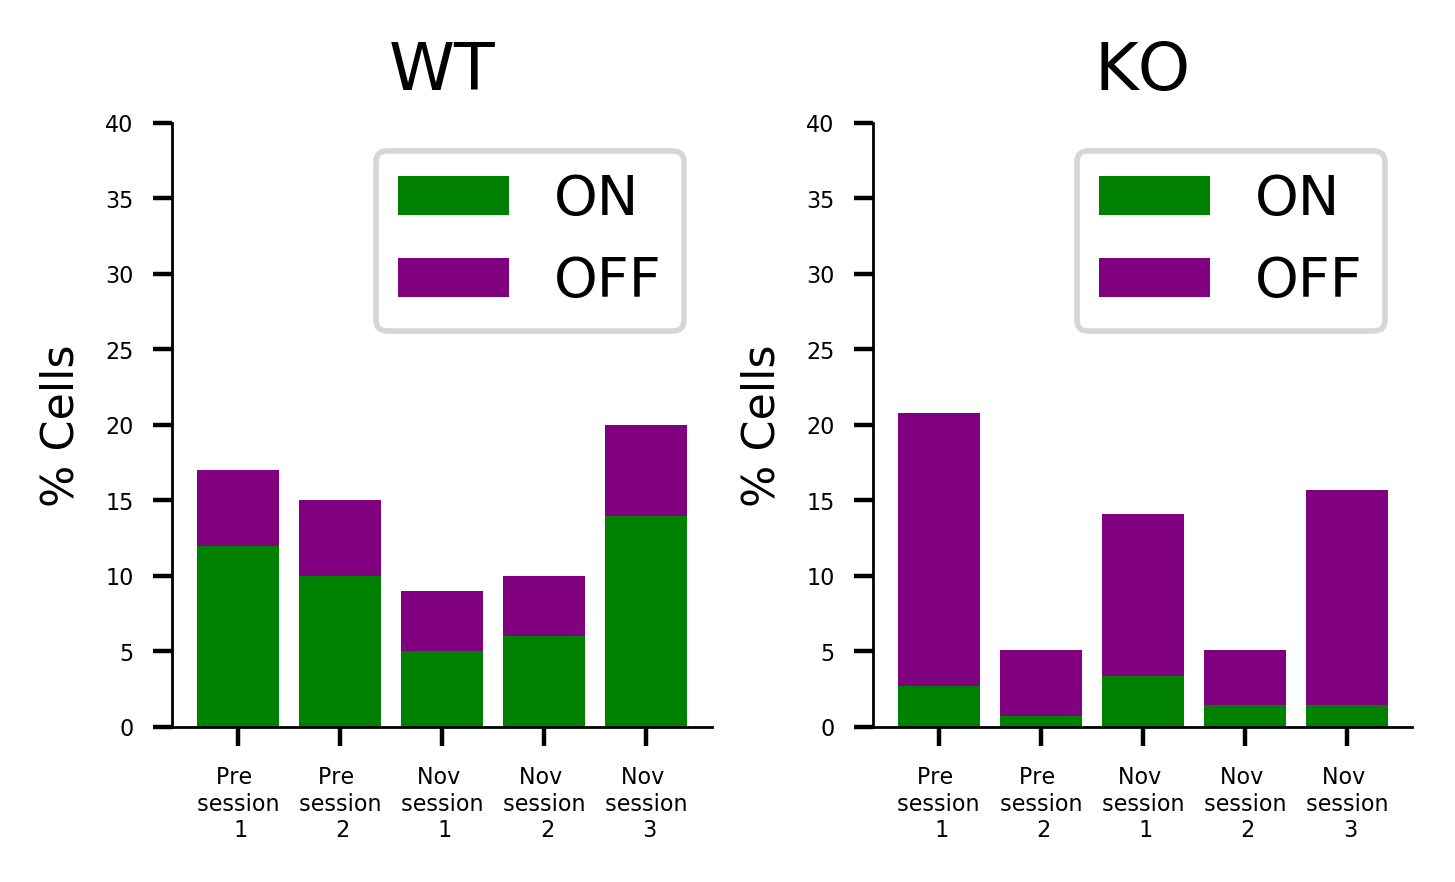

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(4,2), dpi=400, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2)

axs[0] = plt.subplot(gs[0])
axs[0] = plt.bar(['Pre \n session \n 1','Pre \n session \n 2'],ANF_pre_on,  color='green')                                                                                    
axs[0] = plt.bar(['Pre \n session \n 1','Pre \n session \n 2'],ANF_pre_off, bottom = ANF_pre_on, color='purple')
axs[0] = plt.bar(['Nov \n session \n 1','Nov \n session \n 2','Nov \n session \n 3'], ANF_nov_on, color='green')
axs[0] = plt.bar(['Nov \n session \n 1','Nov \n session \n 2','Nov \n session \n 3'], ANF_nov_off, bottom = ANF_nov_on, color='purple')
axs[0] = plt.tick_params(bottom=True, left=True, right=False, labelleft=True, labelbottom=True)
axs[0] = plt.title('WT')
axs[0] = plt.ylabel("% Cells")
axs[0] = plt.ylim(0, 40)
axs[0] = sns.despine()
axs[0] = plt.legend(['ON', 'OFF',])

axs[1] = plt.subplot(gs[1])
axs[1] = plt.bar(['Pre \n session \n 1','Pre \n session \n 2'],KO_percentage_pre_on, color='green')
axs[1] = plt.bar(['Pre \n session \n 1','Pre \n session \n 2'],KO_percentage_pre_off,bottom = KO_percentage_pre_on, color='purple')
axs[1] = plt.bar(['Nov \n session \n 1','Nov \n session \n 2','Nov \n session \n 3'], KO_percentage_nov_on, color='green')
axs[1] = plt.bar(['Nov \n session \n 1','Nov \n session \n 2','Nov \n session \n 3'], KO_percentage_nov_off, bottom = KO_percentage_nov_on, color='purple')
axs[1] = plt.tick_params(bottom=True, left=True, right=False, labelleft=True, labelbottom=True)
axs[1] = plt.title('KO')
axs[1] = plt.ylabel("% Cells")
axs[1] = sns.despine()
axs[1] = plt.ylim(0, 40)
axs[1] = plt.legend(['ON', 'OFF',])
plt.subplots_adjust(wspace=0.3, hspace=0)

plt.savefig('/Users/rufusmitchell-heggs/Desktop/Thesis/all_figures/(infotheory)ONOFF_acrossdays(WTvsKO).png', format='png', dpi=600, bbox_inches = 'tight')
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


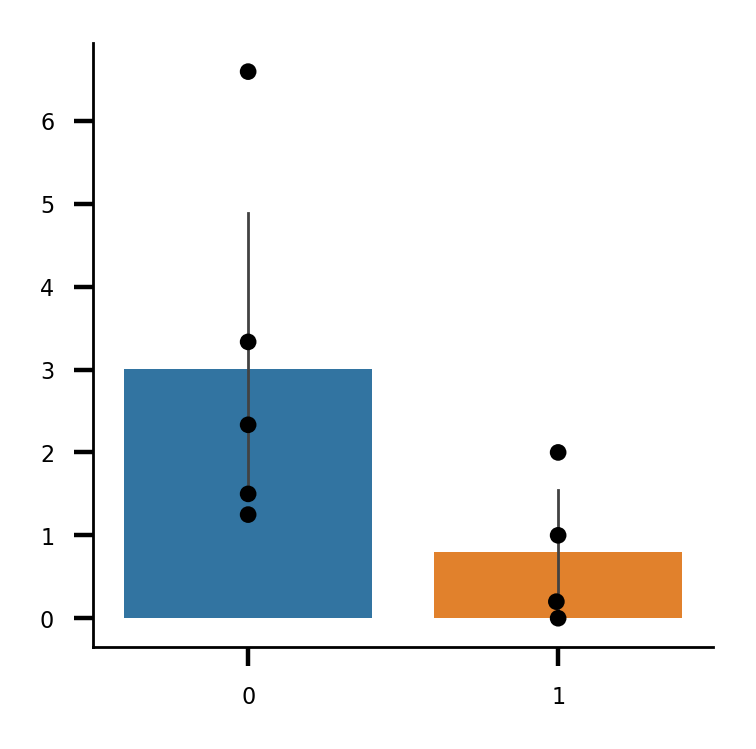

In [34]:
plt.figure(figsize=(2, 2), dpi=400)

ANF_on_off_ratio = [item for sublist in [np.array(ANF_percentage_pre_on)/np.array(ANF_percentage_pre_off), np.array(ANF_percentage_nov_on)/np.array(ANF_percentage_nov_off)] for item in sublist] 
ANL_on_off_ratio = [item for sublist in [np.array(ANL_percentage_pre_on)/np.array(ANL_percentage_pre_off), np.array(ANL_percentage_nov_on)/np.array(ANL_percentage_nov_off)] for item in sublist] 
ANI_on_off_ratio = [item for sublist in [np.array(ANI_percentage_pre_on)/np.array(ANI_percentage_pre_off), np.array(ANI_percentage_nov_on)/np.array(ANI_percentage_nov_off)] for item in sublist] 


ko_on_off_ratio_new = []
for i,j in zip(ANL_on_off_ratio, ANI_on_off_ratio):
    if i-i == 0:
        ko_on_off_ratio_new.append(i)

sns.barplot(data=[ANF_on_off_ratio, ko_on_off_ratio_new], errwidth=.5)
sns.swarmplot(data=[ANF_on_off_ratio, ko_on_off_ratio_new], color="k", s=3)
sns.despine()

# plt.bar(['WT'],ANF_Avg_ratio,yerr=ANF_Avg_ratio_err,error_kw=dict(lw=0.5, capsize=1, capthick=0.5), color=cmap_WT.to_rgba(5))                                                                                    
# plt.bar(['KO'],KO_Avg_ratio,yerr= KO_Avg_ratio_err,error_kw=dict(lw=0.5, capsize=1, capthick=0.5), color=cmap_KO.to_rgba(5))                                                                                    

# plt.tick_params(bottom=True, left=True, right=False, labelleft=True, labelbottom=True)
# plt.ylabel("Ratio ON:OFF Cells")
# plt.ylim(0, 5)
# sns.despine()
# plt.savefig('/Users/rufusmitchell-heggs/Desktop/Thesis/all_figures/(infotheory)ONOFF_ratio_WTKO.png', format='png', dpi=600, bbox_inches = 'tight')
# plt.show()


# cmap_KO

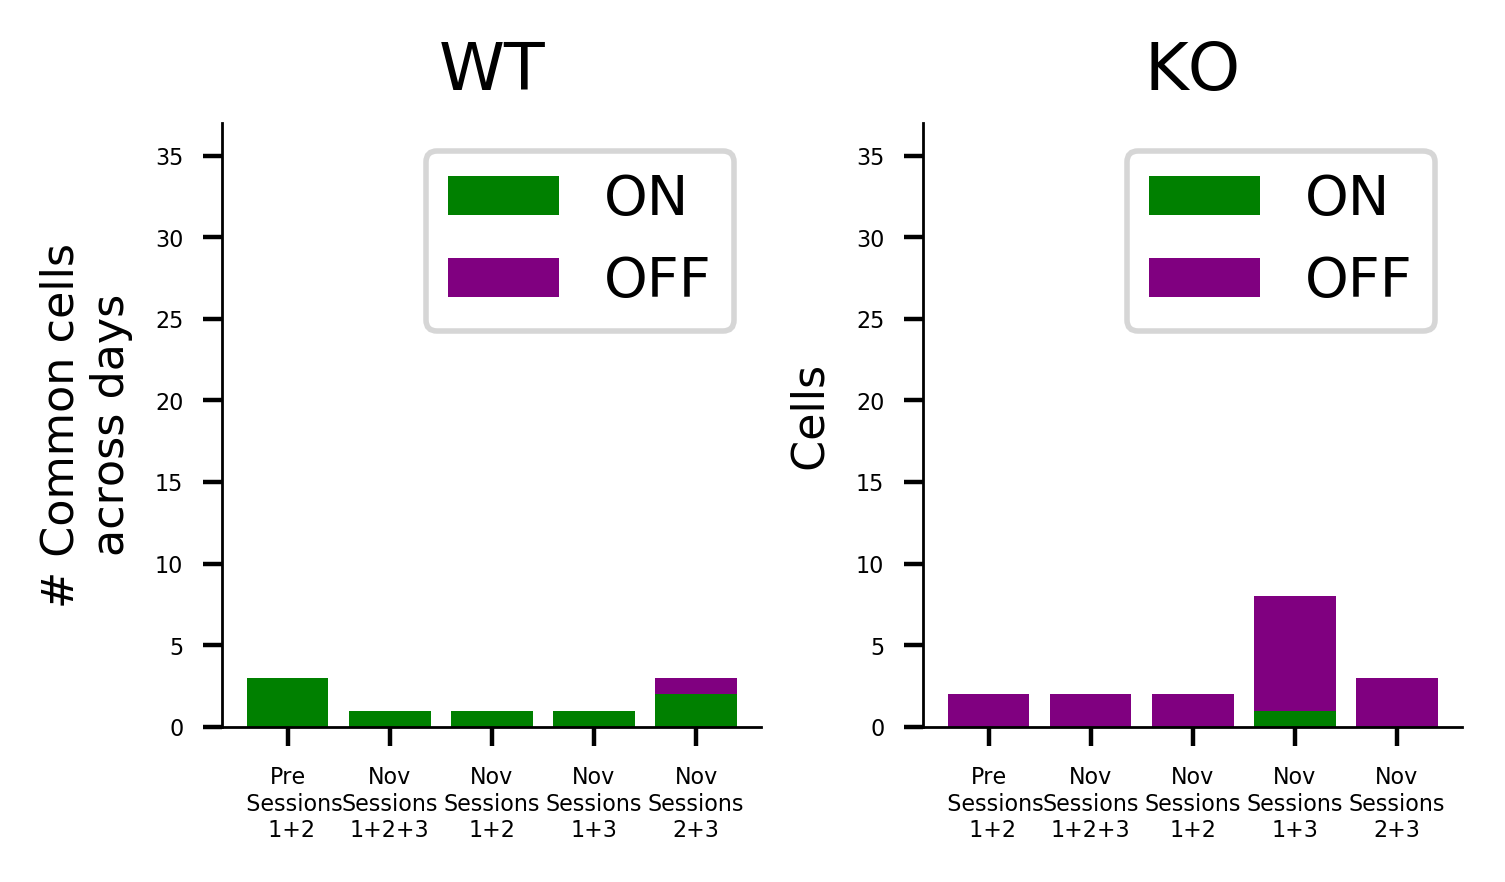

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(4,2), dpi=400, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2)

axs[0] = plt.subplot(gs[0])
axs[0] = plt.bar(["Pre" + "\n" + "  Sessions" + "\n" + " 1+2"],ANF_preon_common,  color='green')                                                                                    
axs[0] = plt.bar(["Pre" + "\n" + "  Sessions" + "\n" + " 1+2"],ANF_preoff_common, bottom = ANF_preon_common, color='purple')
axs[0] = plt.bar(["Nov" + "\n" + "Sessions" + "\n" + "1+2+3" ,"Nov" + "\n" + "Sessions" + "\n" + "1+2",
                    "Nov" + "\n" + "Sessions" + "\n" + "1+3", "Nov" + "\n" + "Sessions" + "\n" + "2+3"], ANF_novon_common, color='green')
axs[0] = plt.bar(["Nov" + "\n" + "Sessions" + "\n" + "1+2+3" ,"Nov" + "\n" + "Sessions" + "\n" + "1+2",
                    "Nov" + "\n" + "Sessions" + "\n" + "1+3", "Nov" + "\n" + "Sessions" + "\n" + "2+3"], ANF_novoff_common, bottom = ANF_novon_common, color='purple')
axs[0] = plt.tick_params(bottom=True, left=True, right=False, labelleft=True, labelbottom=True)
axs[0] = plt.title('WT')
axs[0] = plt.ylabel("# Common cells" + "\n" + "across days")
axs[0] = plt.ylim(0, 37)
axs[0] = sns.despine()
axs[0] = plt.legend(['ON', 'OFF',])

axs[1] = plt.subplot(gs[1])
axs[1] = plt.bar(["Pre" + "\n" + "  Sessions" + "\n" + " 1+2"],KO_preon_common_pooled, color='green')
axs[1] = plt.bar(["Pre" + "\n" + "  Sessions" + "\n" + " 1+2"],KO_preoff_common_pooled, bottom = KO_preon_common_pooled, color='purple')
axs[1] = plt.bar(["Nov" + "\n" + "Sessions" + "\n" + "1+2+3" ,"Nov" + "\n" + "Sessions" + "\n" + "1+2",
                    "Nov" + "\n" + "Sessions" + "\n" + "1+3", "Nov" + "\n" + "Sessions" + "\n" + "2+3"], KO_novon_common_pooled, color='green')
axs[1] = plt.bar(["Nov" + "\n" + "Sessions" + "\n" + "1+2+3" ,"Nov" + "\n" + "Sessions" + "\n" + "1+2",
                    "Nov" + "\n" + "Sessions" + "\n" + "1+3", "Nov" + "\n" + "Sessions" + "\n" + "2+3"], KO_novoff_common_pooled, bottom = KO_novon_common_pooled, color='purple')
axs[1] = plt.tick_params(bottom=True, left=True, right=False, labelleft=True, labelbottom=True)
axs[1] = plt.title('KO')
axs[1] = plt.ylabel(" Cells")
axs[1] = sns.despine()
axs[1] = plt.ylim(0, 37)
axs[1] = plt.legend(['ON', 'OFF',])
plt.subplots_adjust(wspace=0.3, hspace=0)

plt.savefig('/Users/rufusmitchell-heggs/Desktop/Thesis/all_figures/(infotheory)common_ONOFF_acrossdays(WTvsKO).png', format='png', dpi=600, bbox_inches = 'tight')
plt.show()

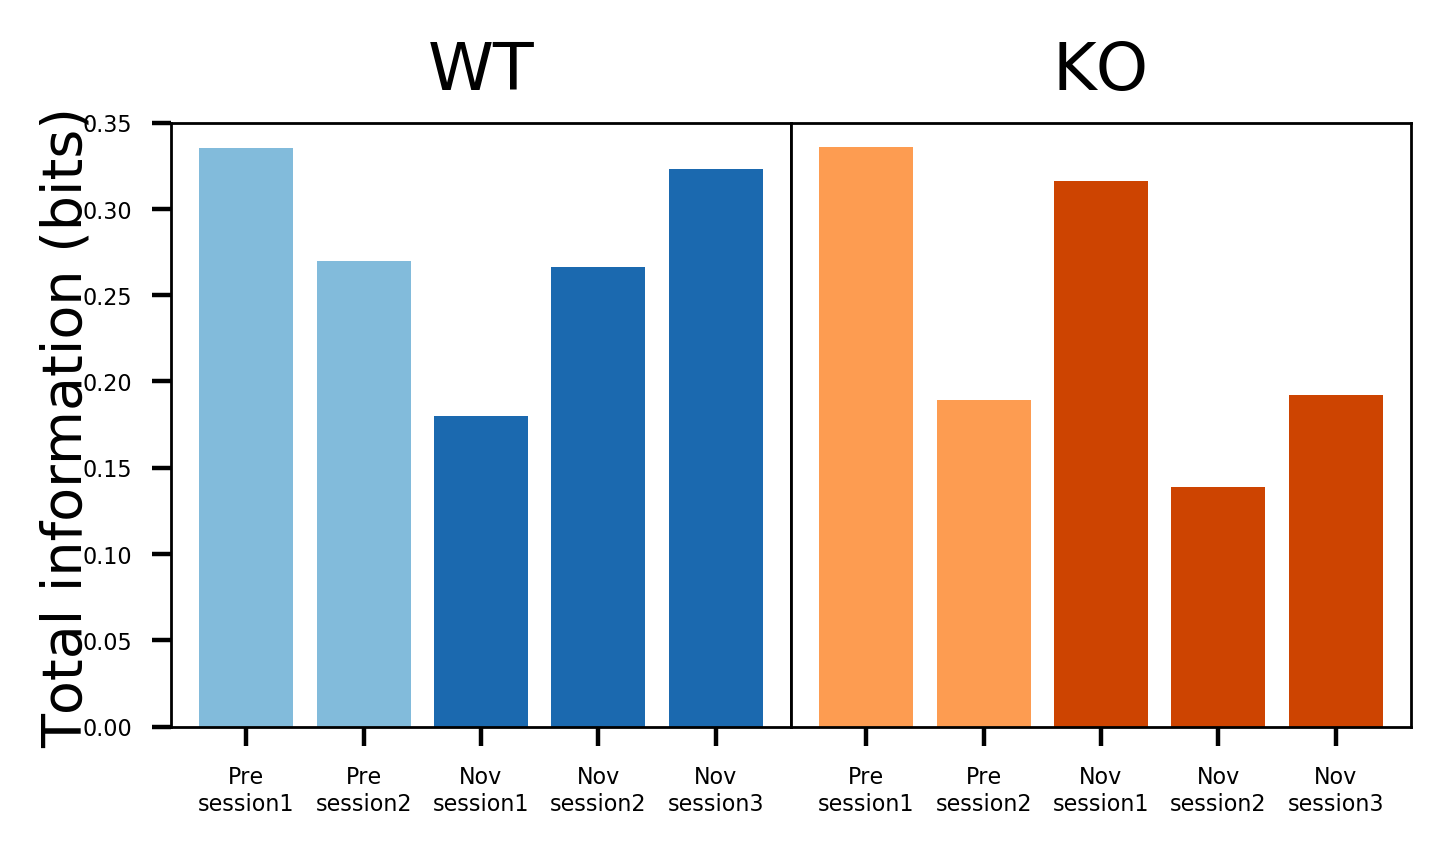

In [36]:
# WT
ANF_total_information_pre = [0.335, 0.270]
ANF_total_information_nov = [0.180, 0.266, 0.323]

# KO
ANL_total_information_pre = [0.067, 0.043]
ANL_total_information_nov = [0.057, 0.045, 0.072]

ANI_total_information_pre = [0.269, 0.146]
ANI_total_information_nov = [0.259, 0.094, 0.120]

KO_total_information_pre_avg = np.mean(np.array([ANL_total_information_pre, ANI_total_information_pre]), axis=0)
KO_total_information_pre_err = stats.sem(np.array([ANL_total_information_pre, ANI_total_information_pre]))
KO_total_information_nov_avg = np.mean(np.array([ANL_total_information_nov, ANI_total_information_nov]), axis=0)
KO_total_information_nov_err = stats.sem(np.array([ANL_total_information_nov, ANI_total_information_nov]))

#KO pooled
KO_total_information_pre_pooled = np.array(ANL_total_information_pre) + np.array(ANI_total_information_pre)
KO_total_information_nov_pooled = np.array(ANL_total_information_nov) + np.array(ANI_total_information_nov)

# ANF_total_information_nov_cage1 = [0.164, 0.231, 0.194]
# ANF_total_information_nov_cage2 = [0.070, 0.126, 0.182]

fig, axs = plt.subplots(1, 2, figsize=(4,2), dpi=400, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2)

axs[0] = plt.subplot(gs[0])
axs[0] = plt.bar(["Pre" + "\n" + "session1","Pre" + "\n" + "session2"], ANF_total_information_pre, color=cmap_WT.to_rgba(5))
axs[0] = plt.bar(["Nov" + "\n" + "session1","Nov" + "\n" + "session2","Nov" + "\n" + "session3"], ANF_total_information_nov, color=cmap_WT.to_rgba(8))
axs[0] = plt.ylim((0, 0.35))
axs[0] = plt.title('WT')

axs[1] = plt.subplot(gs[1])
axs[1] = plt.bar(["Pre" + "\n" + "session1","Pre" + "\n" + "session2"], KO_total_information_pre_pooled, color=cmap_KO.to_rgba(5))
axs[1] = plt.bar(["Nov" + "\n" + "session1","Nov" + "\n" + "session2","Nov" + "\n" + "session3"], KO_total_information_nov_pooled, color=cmap_KO.to_rgba(8))
axs[1] = plt.ylim((0, 0.35))
axs[1] = plt.tick_params(bottom=True, left=False, right=False, labelleft=False, labelbottom=True)

axs[1] = plt.title('KO')

plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.06, 0.5,"Total information (bits)", ha='center', va='center', rotation='vertical')
plt.savefig('/Users/rufusmitchell-heggs/Desktop/Thesis/all_figures/Total_informationacrossdays.png', format='png', dpi=600, bbox_inches = 'tight')




In [48]:
insert_animal = 'F'

inputEventTrace = '/Users/rufusmitchell-heggs/Desktop/data/preprocessing/AN'+insert_animal+'/preprocessed_files/AN'+insert_animal+'mega_events.csv'
inputTrace = '/Users/rufusmitchell-heggs/Desktop/data/preprocessing/AN'+insert_animal+'/preprocessed_files/AN'+insert_animal+'mega_trace.csv'
inputcelllocation = '/Users/rufusmitchell-heggs/Desktop/data/preprocessing/AN'+insert_animal+'/AN'+insert_animal+'Traces-props.csv'

data_event = pd.read_csv(inputEventTrace, sep=',', dtype=str, error_bad_lines=False, encoding="utf-8-sig")
data_trace = pd.read_csv(inputTrace, sep=',', dtype=str, error_bad_lines=False, encoding="utf-8-sig")
data_trace['unique_stage']=data_trace['stage']+data_trace['session'].astype(str)

In [49]:
def get_session(data_event_or_data_trace):
    """"get session takes the mega_event or trace file in and returns a list of all the session blocks
    INPUT:
    -------
    >> data_event_or_data_trace - mega_events OR mega_trace file
    
    OUTPUT:
    -------
    >> blocks - a list of all events or traces as in dataframe format """

    batches_dic = {'Exp1':1, 'Pre1':2, 'Nov1':3, 'Exp2':4, 'Pre2':5, 'Nov2':6, 'Exp3':7, 'Nov3':8}
    batches = list(set(data_event_or_data_trace.unique_stage))
    sorted_batches = []
    for i in batches:
        sorted_batches.append(batches_dic[i])
    sorted_batches.sort()

    batches = []
    for i in sorted_batches:
        batches.append(list(batches_dic.keys())[list(batches_dic.values()).index(i)])
    
    blocks = []
    for batch in batches:
        blocks.append(data_event_or_data_trace[data_event_or_data_trace['unique_stage']==batch])

    return blocks

traces = get_session(data_trace)
events = get_session(data_event)

events = [events[1], events[2], events[4], events[5], events[7]]
traces = [traces[1], traces[2], traces[4], traces[5], traces[7]]




In [50]:
#Define lists required to save all animal consistency scores across stages
consistencies_all_sessions_on = []
consistencies_all_sessions_off = []

on_cells_all = []
off_cells_all = []
other_cells_all = []

for i in range(len(events)):
    sesh = i
    if insert_animal == 'F' or insert_animal == 'I':
        if i == 1 or i == 3 or i == 4:
            stranger = 'both'
        else:
            stranger = 2
    else:
        if i == 1 or i == 3 or i == 4:
            stranger = 'both'
        else:
            stranger = 1       
#------------------------------------------------------------------------------------------------------
    traces_session = traces[sesh]
    events_session = events[sesh]
    
    animal_df = {'F':ANF_df, 'I':ANI_df, 'L':ANL_df}
    on_cells = np.array(animal_df[insert_animal].loc[:, np.array(events_session['unique_stage'])[0]+'on'])
    off_cells = np.array(animal_df[insert_animal].loc[:, np.array(events_session['unique_stage'])[0]+'off'])
    
    animal_cell_count = {'F':238, 'I':126, 'L':74}
    all_cells = traces_session.iloc[: , 2:animal_cell_count[insert_animal]] #<---- (ANF - 238 cells, ANI - 126 cells, ANL - 74 cells)
    cells_dictionary = traces_session.iloc[: , 2:animal_cell_count[insert_animal]].loc[:,~(traces_session==" nan").any()].columns.values
    nan_cells = (set(all_cells.columns.values).difference(cells_dictionary))
    
    on, off = [[],[]]
    for cell in range(len(cells_dictionary)):
        if cells_dictionary[cell] in on_cells:
            on.append(cell)
        if cells_dictionary[cell] in off_cells:
            off.append(cell)
            
    other_cells = list(set(cells_dictionary) - set(on_cells) - set(off_cells))
            
    data_trace = np.array(traces_session[cells_dictionary].astype(float)).transpose()
    data_trace = normalize(data_trace, axis = 1)
    data_events =np.array(events_session[cells_dictionary].astype(float)).transpose()
    data_events_normalized = normalize(data_events, axis=1)

    behav_vector = np.array(traces_session['raw_behaviour'].astype(float))

    cage = stranger
    behav_vec_cropped = []
    for i in behav_vector:
        if cage == 2:
            if i == 2:
                behav_vec_cropped.append(1)
            elif i == 1:
                behav_vec_cropped.append(0)
            else:
                behav_vec_cropped.append(0) 
        elif cage == 1:
            if i == 2:
                behav_vec_cropped.append(0)
            elif i == 1:
                behav_vec_cropped.append(1)
            else:
                behav_vec_cropped.append(0) 
        elif cage == 'both':
            if i > 0:
                behav_vec_cropped.append(1)
            else:
                behav_vec_cropped.append(0) 

    behav_vector = np.array(behav_vec_cropped)
#------------------------------------------------------------------------------------------------------
    def spike_binning(spike_array, bin_size=4):
        bin_size = bin_size
        binned_spikes = []
        for neuron in spike_array:
            per_neuron=[]
            i=0
            while i <= len(neuron):
                per_neuron.append(sum(neuron[i:i+bin_size]))
                i+=bin_size
            binned_spikes.append(per_neuron)
        return binned_spikes

    def behav_vector_binning(behav_vector, bin_size=4):
        bin_size = bin_size
        binned_behav_vector = []
        i=0
        while i <= len(behav_vector):
            binned_behav_vector.append(stats.mode(behav_vector[i:i+bin_size])[0])
            i+=bin_size
        return binned_behav_vector

    binned_data_events = np.array(spike_binning(data_events_normalized))
    binned_behav_vector = np.array(behav_vector_binning(behav_vector)).transpose()[0]
#------------------------------------------------------------------------------------------------------
    def consistency(data_events, behavioural_vector, status='on'):
        interaction_bouts = []
        bout = []
        for i in range(len(behavioural_vector)):
            if behavioural_vector[i] == 1:
                bout.append(i)
            elif len(bout) > 0:
                interaction_bouts.append([min(bout), max(bout)])
                bout = []
            else:
                bout = []
        engagement_matrix_all = []
        consistency_all = []
        for neuron in data_events:
            engagement_matrix = []
            for i in interaction_bouts:
                if status == 'on':
                    if sum(neuron[i[0]:i[1]]) > 0:
                        engagement_matrix.append(1)
                    else:
                        engagement_matrix.append(0)
                elif status =='off':
                    if sum(neuron[i[0]:i[1]]) == 0:
                        engagement_matrix.append(1)
                    else:
                        engagement_matrix.append(0)
            engagement_matrix_all.append(engagement_matrix)
            consistency_all.append((sum(engagement_matrix)/len(interaction_bouts))*100)
        engagement_matrix_all = np.array(engagement_matrix_all)
        consistency_all = np.array(consistency_all)

        return engagement_matrix_all, consistency_all

#------------------------------------------------------------------------------------------------------
    on_engagement, on_consistency_all = consistency(binned_data_events[on], binned_behav_vector, status = 'on')
    off_engagement, off_consistency_all = consistency(binned_data_events[off], binned_behav_vector, status='off')
    
    consistencies_all_sessions_on.append(on_consistency_all)
    consistencies_all_sessions_off.append(off_consistency_all)
    
    box_on = [item for sublist in consistencies_all_sessions_on for item in sublist]
    box_off = [item for sublist in consistencies_all_sessions_off for item in sublist]
    
    for i in on_cells:
        if len(str(i))>1:
            on_cells_all.append(i)
    for i in off_cells:
        if len(str(i))>1:
            off_cells_all.append(i)
    for i in other_cells:
        if len(str(i))>1:
            other_cells_all.append(i)
    
#------------------------------------------------------------------------------------------------------
    if insert_animal == 'F':
        ANF_box = [box_on, box_off]
        on_F, off_F, other_F = [on_cells_all, off_cells_all, other_cells_all]
    elif insert_animal == 'L':
        ANL_box = [box_on, box_off]
        on_L, off_L, other_L = [on_cells_all, off_cells_all, other_cells_all]
    elif insert_animal == 'I':
        ANI_box = [box_on, box_off]
        on_I, off_I, other_I = [on_cells_all, off_cells_all, other_cells_all]

35.9283628344955 95.84871031746032 23.834859614742502 98.22637997162306


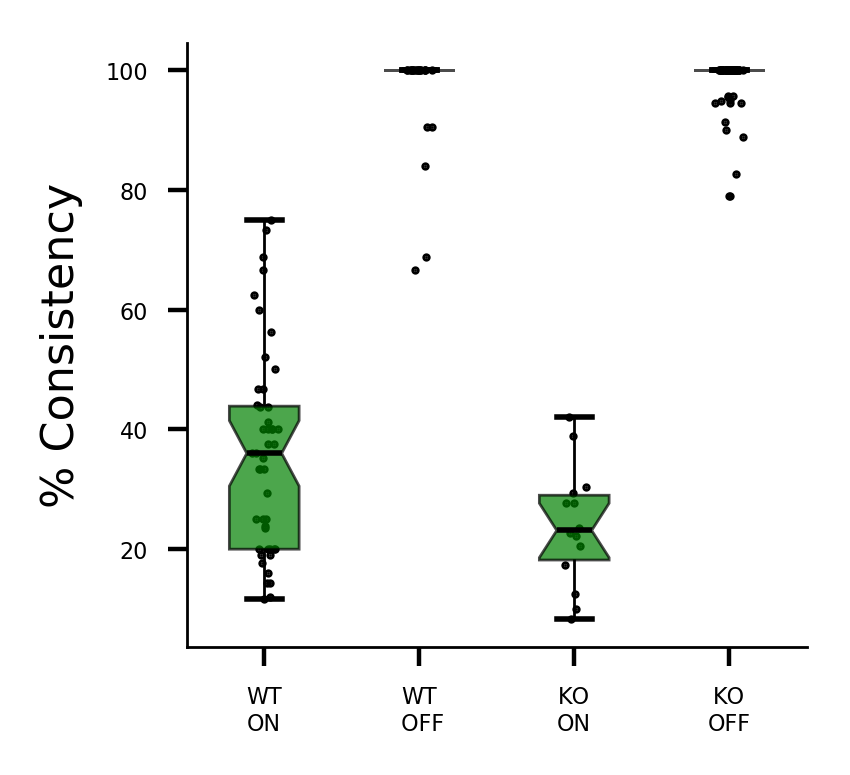

In [51]:
mpl.rcParams['boxplot.whiskerprops.linewidth'] = 0.5
mpl.rcParams['boxplot.boxprops.linewidth'] = 0.5
mpl.rcParams['boxplot.medianprops.linewidth'] = 0.5
mpl.rcParams['boxplot.flierprops.linewidth'] = 0.5
mpl.rcParams['errorbar.capsize'] = 0.1

KO_boxes_on = [item for sublist in [ANL_box[0], ANI_box[0]] for item in sublist]
KO_boxes_off = [item for sublist in [ANL_box[1], ANI_box[1]] for item in sublist]

all_animals_box = [ANF_box[0],ANF_box[1],KO_boxes_on, KO_boxes_off]
print(np.mean(ANF_box[0]),np.mean(ANF_box[1]),np.mean(KO_boxes_on), np.mean(KO_boxes_off))

plt.figure(figsize=(2, 2), dpi=400)

medianprops = dict(linestyle='-.', linewidth=1, color='black')


box1 = plt.boxplot(all_animals_box, labels = ["WT" + "\n" + "ON","WT" + "\n" + " OFF","KO" + "\n" + "ON", "KO" + "\n" + "OFF"], 
            positions=[1,2,3,4], notch=True, patch_artist=True, medianprops=medianprops, showfliers=False)

colors = ['green',
          'purple',
          'green',
          'purple']

for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    
plt.setp(box1["means"], markeredgecolor='black')
sns.despine(top=True, right=True)
plt.ylabel("% Consistency")
plt.savefig('/Users/rufusmitchell-heggs/Desktop/Thesis/all_figures/ONOFF(infotheory)_boxplot.png', format='png', dpi=600, bbox_inches = 'tight')

for i in range(4):
    y = all_animals_box[i]
    x = np.random.normal(1+i, 0.04, size=len(y))
    plt.plot(x, y, 'k.', markersize=1)

In [52]:
on_off_all = {'Fon':on_F,'Foff':off_F,'Fother':other_F,
              'Lon':on_L,'Loff':off_L,'Lother':other_L,
              'Ion':on_I,'Ioff':off_I,'Iother':other_I}

on_all = pd.DataFrame({'Name':on_off_all[insert_animal+'on']})
off_all = pd.DataFrame({'Name':on_off_all[insert_animal+'off']})
other_all = pd.DataFrame({'Name':on_off_all[insert_animal+'other']})

cell_locations = pd.read_csv(inputcelllocation, sep=',', dtype=str, error_bad_lines=False, encoding="utf-8-sig")
cell_locations['Name'] = ' '+cell_locations['Name']


on_cell_locations = pd.merge(on_all, cell_locations, on="Name")
off_cell_locations = pd.merge(off_all, cell_locations, on="Name")
other_cell_locations = pd.merge(other_all, cell_locations, on="Name")

onxy = np.array([on_cell_locations['CentroidX'].astype(float), on_cell_locations['CentroidY'].astype(float)]).transpose()
offxy = np.array([off_cell_locations['CentroidX'].astype(float), off_cell_locations['CentroidY'].astype(float)]).transpose()
otherxy = np.array([other_cell_locations['CentroidX'].astype(float), other_cell_locations['CentroidY'].astype(float)]).transpose()
allxy = np.array([cell_locations['CentroidX'].astype(float), cell_locations['CentroidY'].astype(float)]).transpose()

def euclidean_dis(xy1,xy2):
    euc_dis_all = []
    for i in xy1:
        euc_dis = []
        for j in xy2:
            euc_dis.append(distance.euclidean(i, j)/1.42)
        euc_dis_all.append(np.mean(euc_dis))
    return euc_dis_all

if insert_animal == 'F':
    on_on_disF = np.array(euclidean_dis(onxy, onxy))
    on_all_disF = np.array(euclidean_dis(onxy, allxy))
    off_off_disF = np.array(euclidean_dis(offxy, offxy))
    off_all_disF = np.array(euclidean_dis(offxy, allxy))
    other_other_disF = np.array(euclidean_dis(otherxy, otherxy))
    other_all_disF = np.array(euclidean_dis(otherxy, allxy))
    on_pearsons_F = stats.pearsonr(on_on_disF, on_all_disF)    
    off_pearsons_F = stats.pearsonr(off_off_disF, off_all_disF) 
    other_pearsons_F = stats.pearsonr(other_other_disF, other_all_disF) 
elif insert_animal == 'L':
    on_on_disL = np.array(euclidean_dis(onxy, onxy))
    on_all_disL = np.array(euclidean_dis(onxy, allxy))
    off_off_disL = np.array(euclidean_dis(offxy, offxy))
    off_all_disL = np.array(euclidean_dis(offxy, allxy))
    other_other_disL = np.array(euclidean_dis(otherxy, otherxy))
    other_all_disL = np.array(euclidean_dis(otherxy, allxy))
    on_pearsons_L = stats.pearsonr(on_on_disL, on_all_disL)    
    off_pearsons_L = stats.pearsonr(off_off_disL, off_all_disL) 
    other_pearsons_L = stats.pearsonr(other_other_disL, other_all_disL) 
elif insert_animal == 'I':
    on_on_disI = np.array(euclidean_dis(onxy, onxy))
    on_all_disI = np.array(euclidean_dis(onxy, allxy))
    off_off_disI = np.array(euclidean_dis(offxy, offxy))
    off_all_disI = np.array(euclidean_dis(offxy, allxy))
    other_other_disI = np.array(euclidean_dis(otherxy, otherxy))
    other_all_disI = np.array(euclidean_dis(otherxy, allxy))
    on_pearsons_I = stats.pearsonr(on_on_disI, on_all_disI)    
    off_pearsons_I = stats.pearsonr(off_off_disI, off_all_disI) 
    other_pearsons_I = stats.pearsonr(other_other_disI, other_all_disI)
    
on_pearsons_KO = stats.pearsonr(np.concatenate((on_on_disI,on_on_disL)) , np.concatenate((on_all_disI,on_all_disL)))    
off_pearsons_KO = stats.pearsonr(np.concatenate((off_off_disI,off_off_disL)) , np.concatenate((off_all_disI,off_all_disL)))    
other_pearsons_KO = stats.pearsonr(np.concatenate((other_other_disI,other_other_disL)) , np.concatenate((other_all_disI,other_all_disL)))    


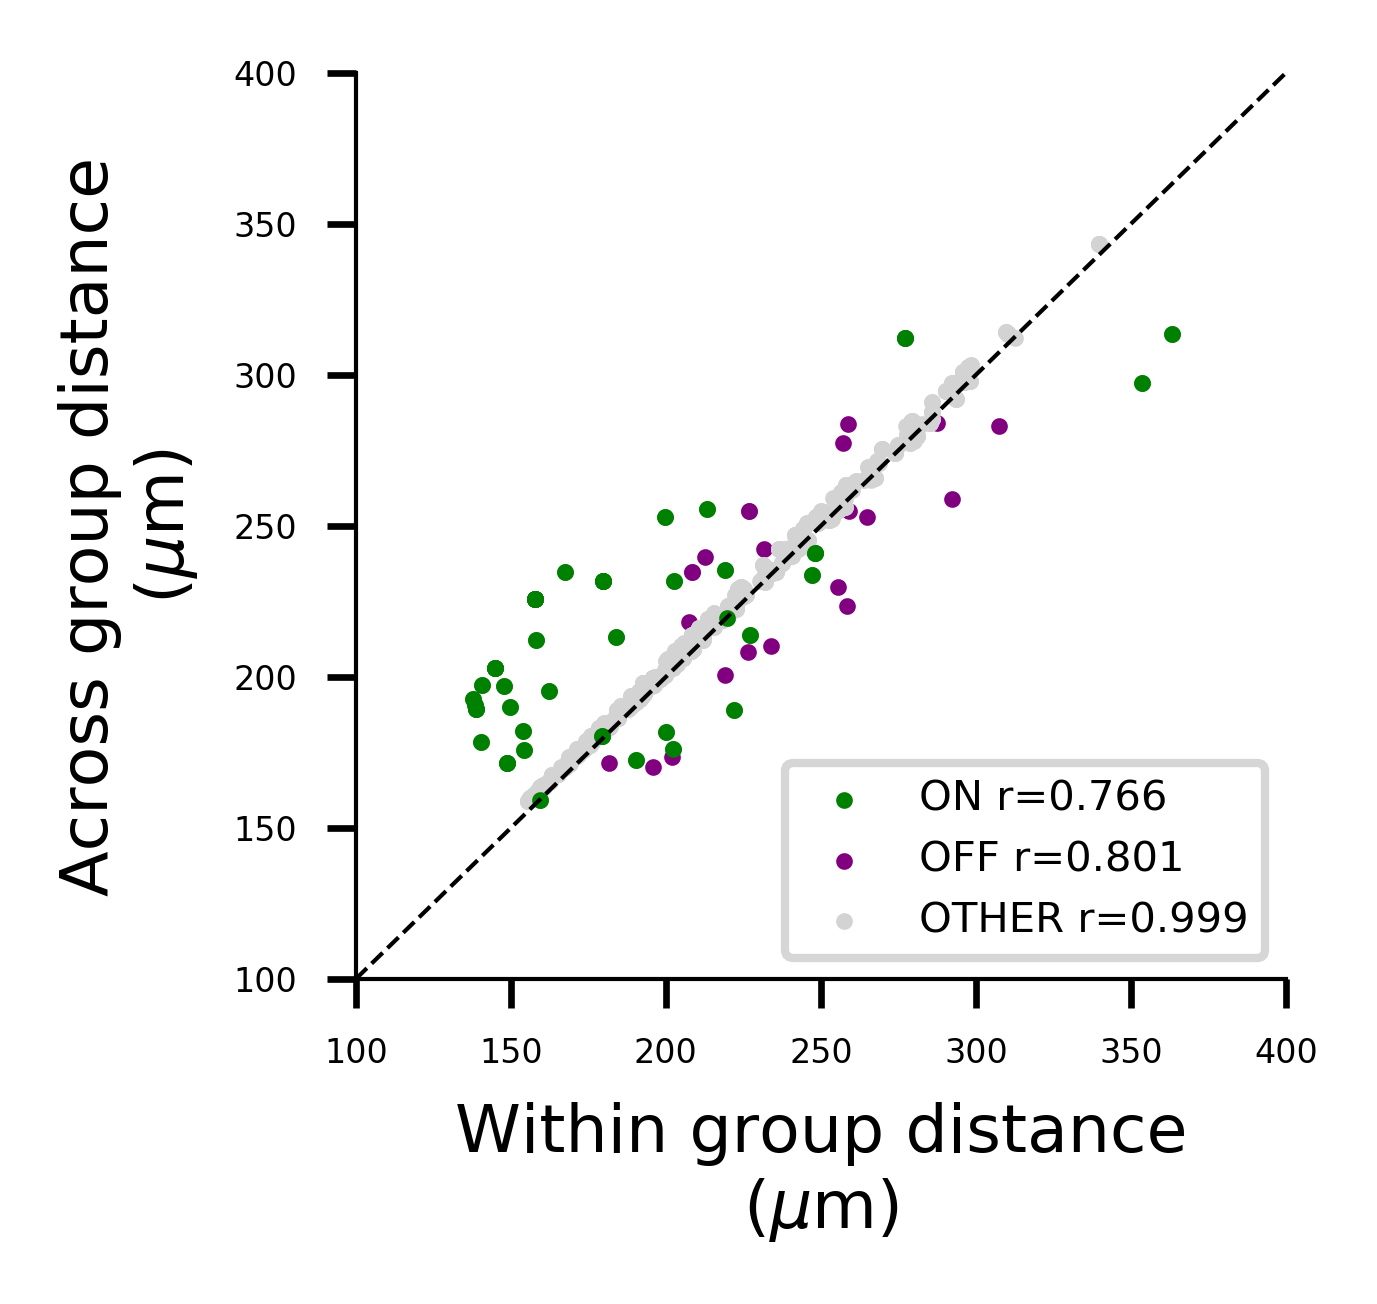

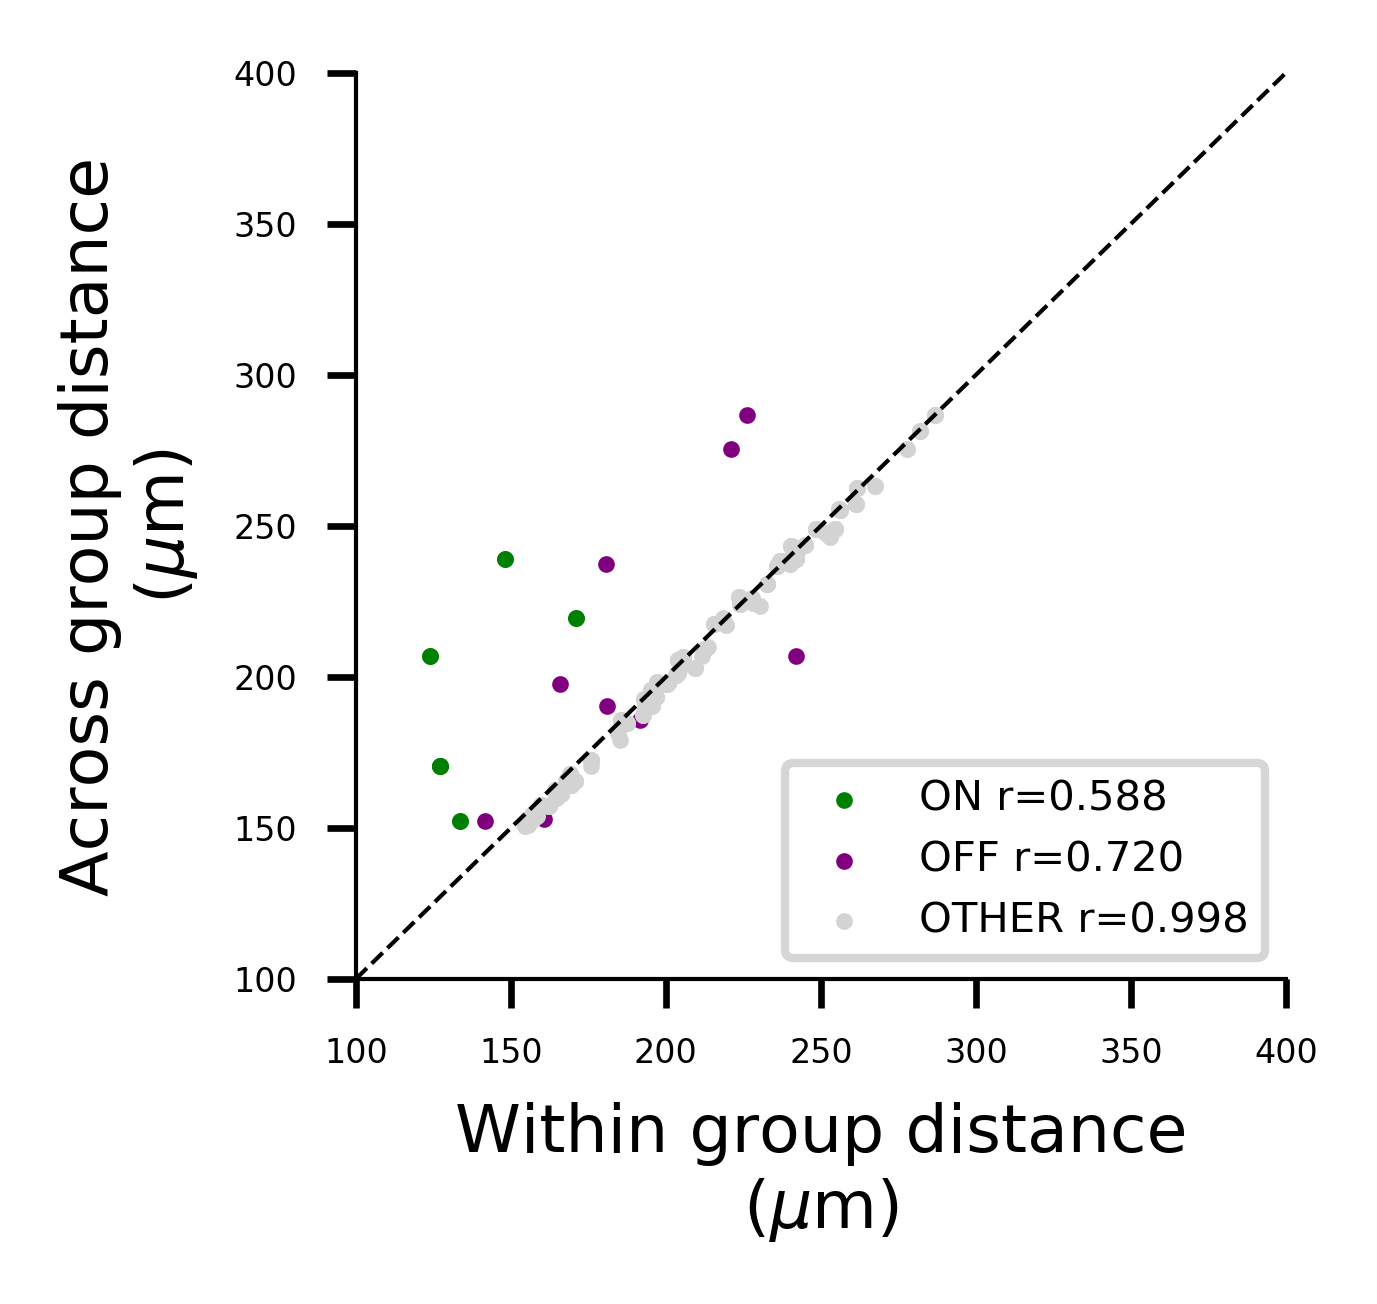

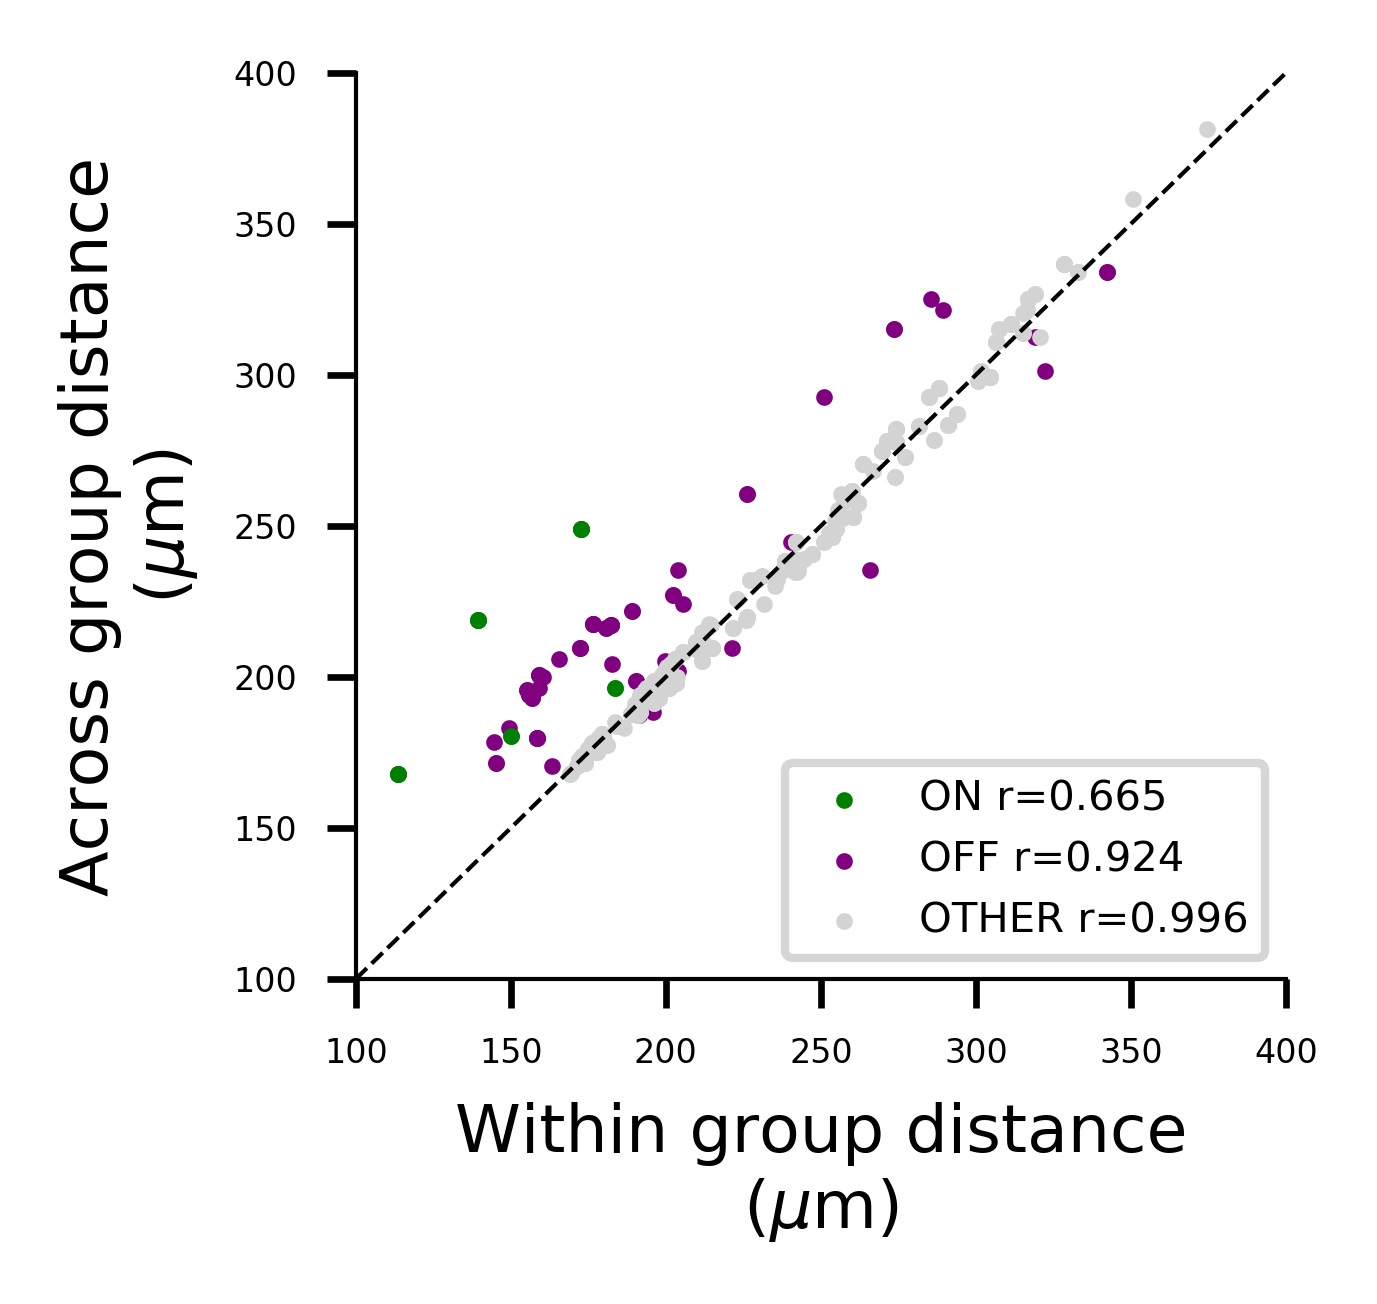

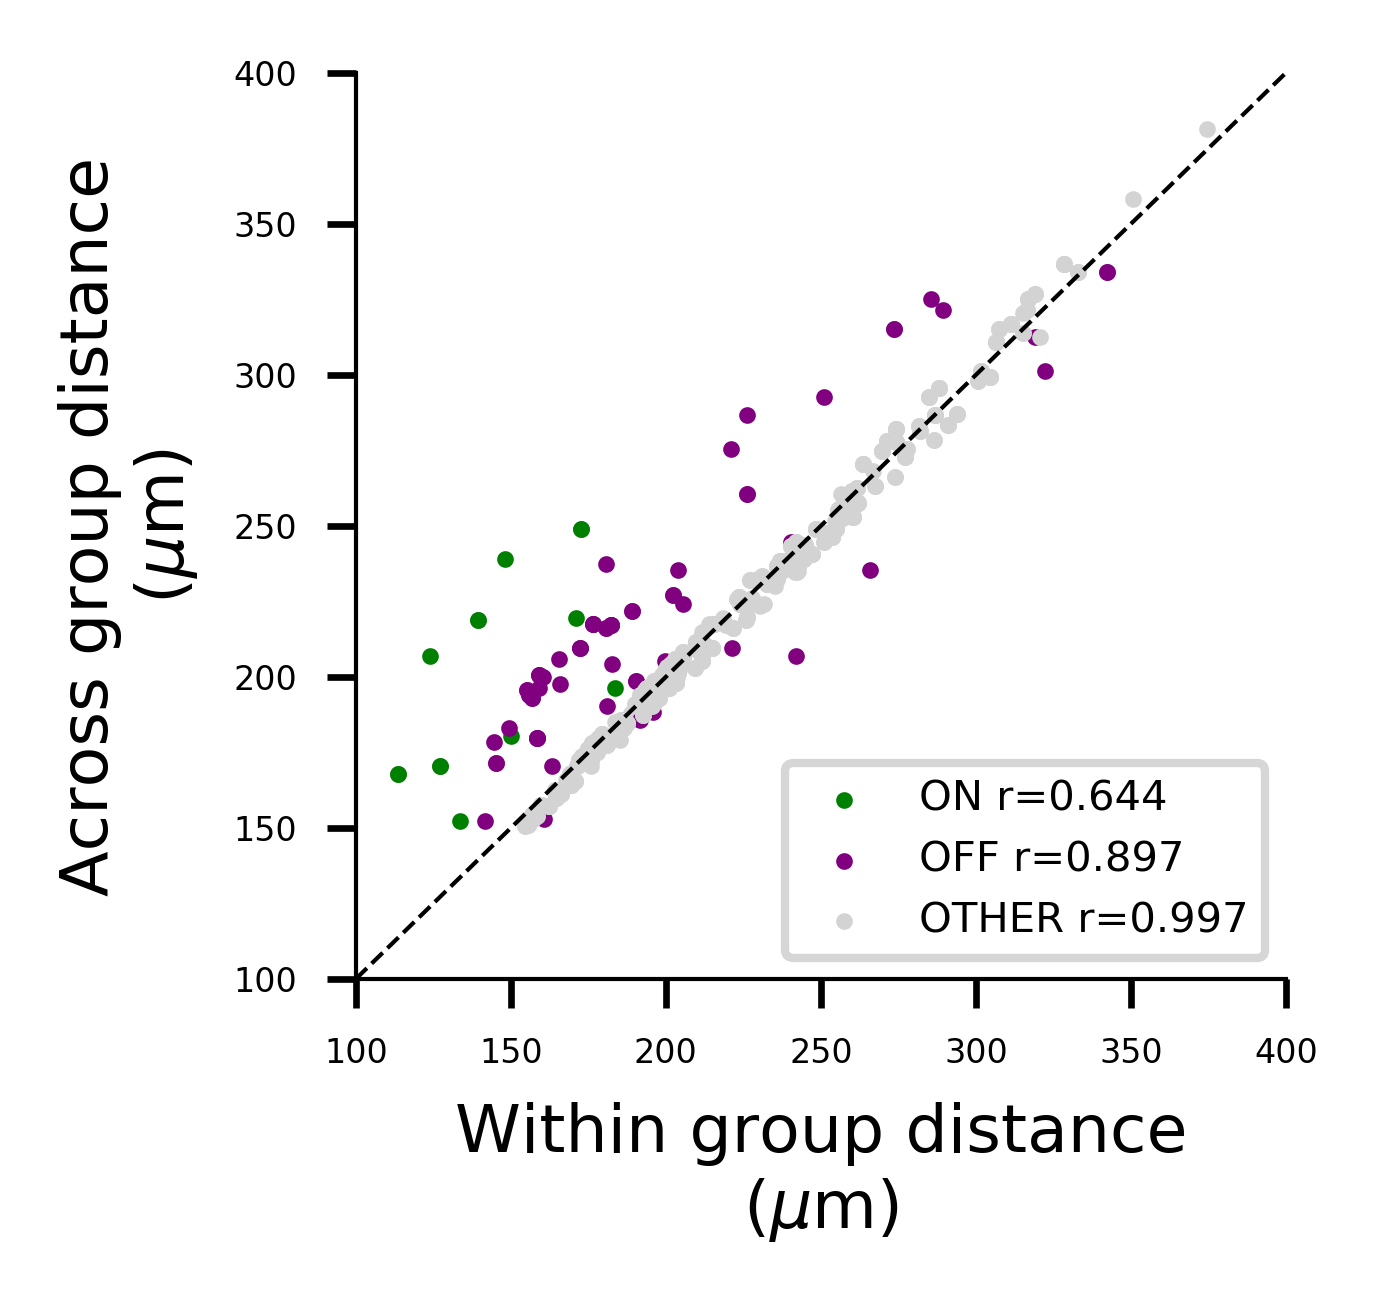

P_ON_ANF=0.0000 P_ON_AN_ANL=0.2196 P_ON_ANI=0.0720 P_ON_KO=0.0000
P_OFF_ANF=0.0000 P_OFF_ANL=0.0288 P_OFF_ANI=0.0000 P_OFF_KO=0.0000
P_OTHER_ANF=0.0000 P_OFF_ANL=0.0000 P_OTHER_ANI=0.0000 P_OTHER_KO=0.0000


In [53]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots(figsize=(2, 2), dpi=600)
ax.scatter(on_on_disF, on_all_disF, color = 'green', s=1)
ax.scatter(off_off_disF, off_all_disF, color = 'purple', s=1)
ax.scatter(other_other_disF, other_all_disF, color = 'lightgray', s=1)
ax.scatter(on_on_disF, on_all_disF, color = 'green', s=1)
ax.legend(['ON r=%.3f'%on_pearsons_F[0], 'OFF r=%.3f'%off_pearsons_F[0], 'OTHER r=%.3f'%other_pearsons_F[0]], loc='lower right', prop={'size': 5})
line = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5)
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(100, 400)
plt.ylim(100, 400)
sns.despine(top=True, right=True)
plt.xlabel("Within group distance" + "\n" + "($\mu$m)")
plt.ylabel("Across group distance" + "\n" + "($\mu$m)")
plt.savefig('/Users/rufusmitchell-heggs/Desktop/Thesis/all_figures/(infotheory)ONOFF_relative_euc_distancesF.png', format='png', dpi=600, bbox_inches = 'tight')
plt.show()

fig, ax = plt.subplots(figsize=(2, 2), dpi=600)
ax.scatter(on_on_disL, on_all_disL, color = 'green', s=1)
ax.scatter(off_off_disL, off_all_disL, color = 'purple', s=1)
ax.scatter(other_other_disL, other_all_disL, color = 'lightgray', s=1)
ax.scatter(on_on_disL, on_all_disL, color = 'green', s=1)
ax.legend(['ON r=%.3f'%on_pearsons_L[0], 'OFF r=%.3f'%off_pearsons_L[0], 'OTHER r=%.3f'%other_pearsons_L[0]], loc='lower right', prop={'size': 5})
line = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5)
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(100, 400)
plt.ylim(100, 400)
sns.despine(top=True, right=True)
plt.xlabel("Within group distance" + "\n" + "($\mu$m)")
plt.ylabel("Across group distance" + "\n" + "($\mu$m)")
plt.savefig('/Users/rufusmitchell-heggs/Desktop/Thesis/all_figures/(infotheory)ONOFF_relative_euc_distancesL.png', format='png', dpi=600, bbox_inches = 'tight')
plt.show()

fig, ax = plt.subplots(figsize=(2, 2), dpi=600)
ax.scatter(on_on_disI, on_all_disI, color = 'green', s=1)
ax.scatter(off_off_disI, off_all_disI, color = 'purple', s=1)
ax.scatter(other_other_disI, other_all_disI, color = 'lightgray', s=1)
ax.scatter(on_on_disI, on_all_disI, color = 'green', s=1)
ax.legend(['ON r=%.3f'%on_pearsons_I[0], 'OFF r=%.3f'%off_pearsons_I[0], 'OTHER r=%.3f'%other_pearsons_I[0]] , loc='lower right', prop={'size': 5})
line = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5)
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(100, 400)
plt.ylim(100, 400)
sns.despine(top=True, right=True)
plt.xlabel("Within group distance" + "\n" + "($\mu$m)")
plt.ylabel("Across group distance" + "\n" + "($\mu$m)")
plt.savefig('/Users/rufusmitchell-heggs/Desktop/Thesis/all_figures/(infotheory)ONOFF_relative_euc_distancesI.png', format='png', dpi=600, bbox_inches = 'tight')
plt.show()

fig, ax = plt.subplots(figsize=(2, 2), dpi=600)
ax.scatter(on_on_disI, on_all_disI, color = 'green', s=1)
ax.scatter(off_off_disI, off_all_disI, color = 'purple', s=1)
ax.scatter(other_other_disI, other_all_disI, color = 'lightgray', s=1)
ax.scatter(on_on_disL, on_all_disL, color = 'green', s=1)
ax.scatter(off_off_disL, off_all_disL, color = 'purple', s=1)
ax.scatter(other_other_disL, other_all_disL, color = 'lightgray', s=1)
ax.legend(['ON r=%.3f'%on_pearsons_KO[0], 'OFF r=%.3f'%off_pearsons_KO[0], 'OTHER r=%.3f'%other_pearsons_KO[0]] , loc='lower right', prop={'size': 5})
line = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5)
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlim(100, 400)
plt.ylim(100, 400)
sns.despine(top=True, right=True)
plt.xlabel("Within group distance" + "\n" + "($\mu$m)")
plt.ylabel("Across group distance" + "\n" + "($\mu$m)")
plt.savefig('/Users/rufusmitchell-heggs/Desktop/Thesis/all_figures/(infotheory)ONOFF_relative_euc_distancesKO.png', format='png', dpi=600, bbox_inches = 'tight')
plt.show()

print('P_ON_ANF=%.4f'%on_pearsons_F[1], 'P_ON_AN_ANL=%.4f'%on_pearsons_L[1], 'P_ON_ANI=%.4f'%on_pearsons_I[1], 'P_ON_KO=%.4f'%off_pearsons_KO[1])
print('P_OFF_ANF=%.4f'%off_pearsons_F[1], 'P_OFF_ANL=%.4f'%off_pearsons_L[1], 'P_OFF_ANI=%.4f'%off_pearsons_I[1], 'P_OFF_KO=%.4f'%off_pearsons_KO[1])
print('P_OTHER_ANF=%.4f'%other_pearsons_F[1], 'P_OFF_ANL=%.4f'%other_pearsons_L[1], 'P_OTHER_ANI=%.4f'%other_pearsons_I[1], 'P_OTHER_KO=%.4f'%other_pearsons_KO[1])